In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#import category_encoders as ce
#from category_encoders import BinaryEncoder
import warnings
warnings.filterwarnings('ignore')

In [35]:
#loading the datasets
submission_format = pd.read_csv(r'C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\submission_format.csv')
test_set_features = pd.read_csv(r'C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\test_set_features.csv')
training_set_features = pd.read_csv(r'C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\training_set_features.csv')
training_set_labels = pd.read_csv(r'C:\Users\Gichuhi\Desktop\DataScience\P3_PROJECT\Data\training_set_labels.csv')

# first few rows of each dataset
print('SUBMISSION FORMAT DATASET')
print(submission_format.info())

print('\nTEST SET FEATURES DATASET')
print(test_set_features.info())

print('\nTRAINING SET FEATURES DATASET')
print(training_set_features.info())

print('\nTRAINING SET LABELS DATASET')
print(training_set_labels.info())


SUBMISSION FORMAT DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   respondent_id     26708 non-null  int64  
 1   h1n1_vaccine      26708 non-null  float64
 2   seasonal_vaccine  26708 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 626.1 KB
None

TEST SET FEATURES DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask       

In [36]:
# Merge the Training Features dataset with the Training Labels dataset on 'respondent_id'
train_merged = pd.merge(training_set_features, training_set_labels, on='respondent_id', how='inner')
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [37]:

# Save the merged dataset to a CSV file 
train_merged.to_csv('H1N1_and_Seasonal_Flu_Vaccine.csv', index=False)

In [38]:
df = pd.read_csv('H1N1_and_Seasonal_Flu_Vaccine.csv')

## Data Cleaning

In [39]:
# checking for duplicates
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
26702    False
26703    False
26704    False
26705    False
26706    False
Length: 26707, dtype: bool

In [40]:
# checking for missing values
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [41]:
missing_data = df.isnull().mean() * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data

employment_occupation          50.436215
employment_industry            49.912008
health_insurance               45.957989
income_poverty                 16.561201
doctor_recc_seasonal            8.087767
doctor_recc_h1n1                8.087767
rent_or_own                     7.645936
employment_status               5.477965
marital_status                  5.272026
education                       5.268282
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
opinion_seas_sick_from_vacc     2.010709
opinion_seas_risk               1.924589
opinion_seas_vacc_effective     1.729884
opinion_h1n1_sick_from_vacc     1.479013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
household_adults                0.932340
household_children              0.932340
behavioral_avoidance            0.778822
behavioral_touch_face           0.479275
h1n1_knowledge                  0.434343
h1n1_concern    

The columns with high percentages of misssing values should be dropped.

The rest of the columns with very low percentages of missing data I'll result to just dropping the rows.


In [42]:
# drop columns
df.drop(columns=['employment_industry','employment_occupation','health_insurance'],inplace=True)


In [43]:
#drop rows
df.dropna(inplace=True)
df.isnull().sum().sum()# confirms if there are anymore missing values in the data

0

In [44]:
#checking the number of unique values in each column
# Iterate over each column and print unique values
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values ({len(unique_values)}): {unique_values}")
    print("-" * 50)

Column: respondent_id
Unique values (19642): [    0     1     3 ... 26702 26703 26706]
--------------------------------------------------
Column: h1n1_concern
Unique values (4): [1. 3. 2. 0.]
--------------------------------------------------
Column: h1n1_knowledge
Unique values (3): [0. 2. 1.]
--------------------------------------------------
Column: behavioral_antiviral_meds
Unique values (2): [0. 1.]
--------------------------------------------------
Column: behavioral_avoidance
Unique values (2): [0. 1.]
--------------------------------------------------
Column: behavioral_face_mask
Unique values (2): [0. 1.]
--------------------------------------------------
Column: behavioral_wash_hands
Unique values (2): [0. 1.]
--------------------------------------------------
Column: behavioral_large_gatherings
Unique values (2): [0. 1.]
--------------------------------------------------
Column: behavioral_outside_home
Unique values (2): [1. 0.]
----------------------------------------------

## Exploratory Data Analysis 

In [45]:
df['seasonal_vaccine'].value_counts(normalize=True)


0    0.522045
1    0.477955
Name: seasonal_vaccine, dtype: float64

In [46]:
df['h1n1_vaccine'].value_counts(normalize=True)

0    0.770186
1    0.229814
Name: h1n1_vaccine, dtype: float64

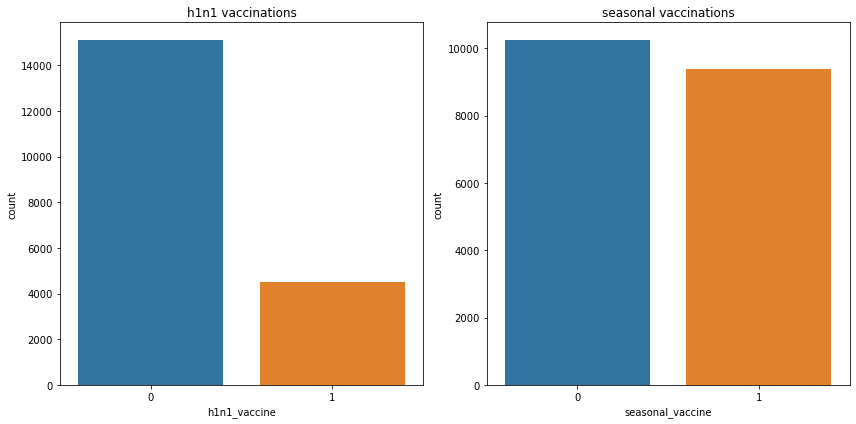

In [47]:
fig, ax = plt.subplots(figsize=(12,6), ncols= 2)
sns.countplot(x='h1n1_vaccine',data=df,ax=ax[0])
sns.countplot(x='seasonal_vaccine',data=df,ax=ax[1])
ax[0].set_title('h1n1 vaccinations')
ax[1].set_title('seasonal vaccinations')
plt.tight_layout()
plt.show();
                


## Univariate Analysis

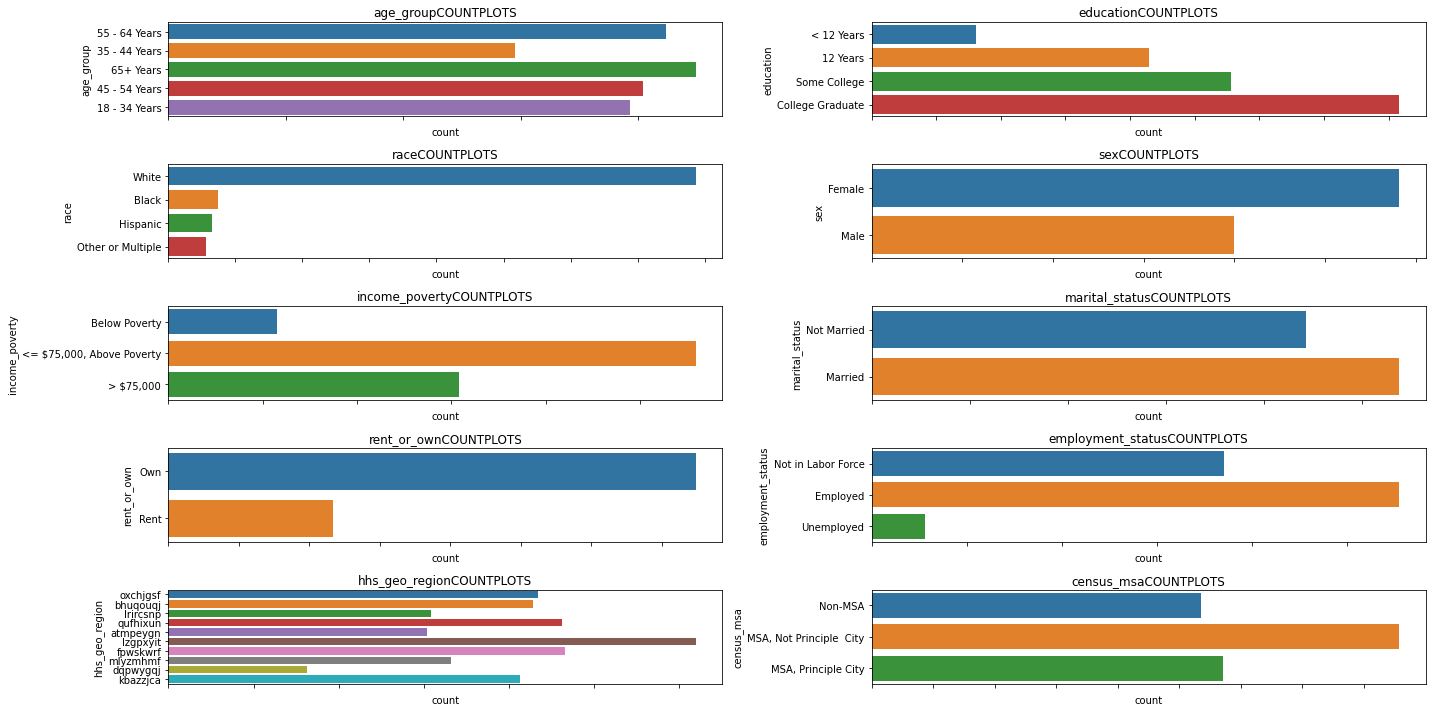

In [48]:
num_plots = 10
cols = df.dtypes[df.dtypes == "object"].index[:num_plots]
fig, axs = plt.subplots(5,2, figsize=(20,10),tight_layout=True)
axs = axs.ravel()

for i, col in enumerate(cols):
    if i < num_plots:
        sns.countplot(y=df[col],ax=axs[i])
        axs[i].set_title(col + "COUNTPLOTS")
        axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation = 90)
plt.show()

